In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
from scipy.stats import boxcox
import warnings

In [ ]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user, 
    postgres_pw, postgres_host, postgres_port, postgres_db))

df_studentsperformance = pd.read_sql_query('select * from studentsperformance',con=engine)
engine.dispose()

THIS WAS NEEDED AS BACKUP WHEN INTERNET WENT DOWN.
df_studentsperformance = pd.read_csv("StudentsPerformance.csv") 

1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.
3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

### 1. Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?

In [66]:
df_studentsperformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [67]:
df_studentsperformance.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [68]:
# Checking to see if there's missing data

# No missing data, so no need to apply any null stripping
df_studentsperformance.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Jarque-Bera test statistics is 15.912256686712709 and p value is 0.0003505075386818213
Normality test statistics is 15.408960513931822 and p value is 0.00045080293869937836
Jarque-Bera test statistics is 11.383300575987892 and p value is 0.0033740202672214448
Normality test statistics is 11.11741279628622 and p value is 0.003853758403576582
Jarque-Bera test statistics is 13.98509448257235 and p value is 0.0009187033894586527
Normality test statistics is 13.606450837263859 and p value is 0.0011101885439899974


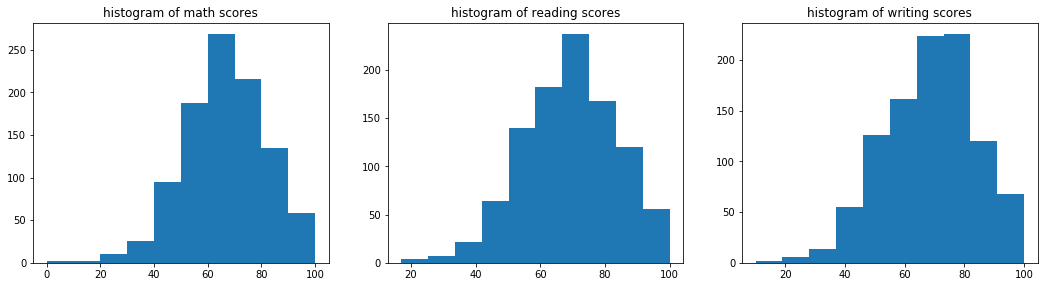

In [82]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

# checking to determine if the test scores are normally distributed
plt.figure(figsize=(18,15))

# histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(df_studentsperformance['math score'])
plt.title('histogram of math scores')

plt.subplot(3, 3, 2)
plt.hist(df_studentsperformance['reading score'])
plt.title('histogram of reading scores')

plt.subplot(3, 3, 3)
plt.hist(df_studentsperformance['writing score'])
plt.title('histogram of writing scores')


# statistically test the data with jarque-bera and normaltest
jb_stats = jarque_bera(df_studentsperformance['math score'])
norm_stats = normaltest(df_studentsperformance['math score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_studentsperformance['reading score'])
norm_stats = normaltest(df_studentsperformance['reading score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(df_studentsperformance['writing score'])
norm_stats = normaltest(df_studentsperformance['writing score'])

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Visually, the scores look relatively normal, however, the jarque_bera and normaltest to confirmed, statistically, that the raw data isn't very normal. Apply Box-Cox to attempt to normalize data.

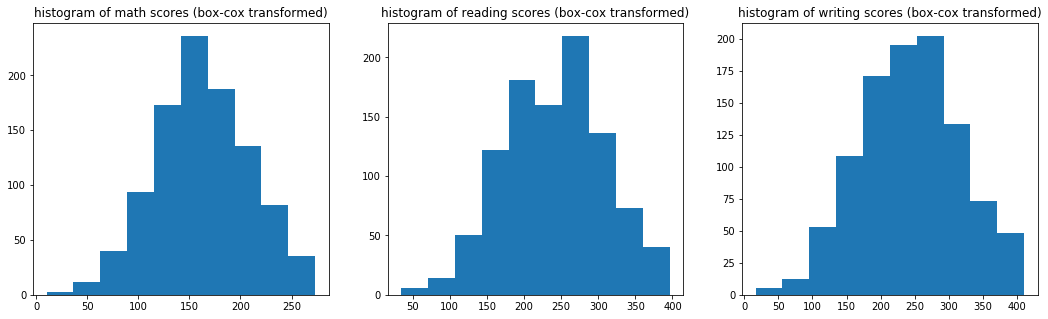

Jarque-Bera test statistics is 1.7200980667409385 and p value is 0.4231413337632879
Normality test statistics is 1.8323072783414356 and p value is 0.40005484084042864
Jarque-Bera test statistics is 4.119778575331906 and p value is 0.1274680814024559
Normality test statistics is 5.282274611852865 and p value is 0.07128015609575467
Jarque-Bera test statistics is 4.746478090040098 and p value is 0.09317842784055597
Normality test statistics is 6.267311355043339 and p value is 0.04355827085023795


In [83]:
math_score_boxcox,_ = boxcox(df_studentsperformance[df_studentsperformance['math score'] > 0]['math score'])
reading_score_boxcox,_ = boxcox(df_studentsperformance['reading score'])
writing_score_boxcox,_ = boxcox(df_studentsperformance['writing score'])

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(math_score_boxcox)
plt.title("histogram of math scores (box-cox transformed)")

plt.subplot(1, 3, 2)
plt.hist(reading_score_boxcox)
plt.title("histogram of reading scores (box-cox transformed)")

plt.subplot(1, 3, 3)
plt.hist(writing_score_boxcox)
plt.title("histogram of writing scores (box-cox transformed)")

plt.show()


# statistically test the data with jarque-bera and normaltest
jb_stats = jarque_bera(math_score_boxcox)
norm_stats = normaltest(math_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(reading_score_boxcox)
norm_stats = normaltest(reading_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(writing_score_boxcox)
norm_stats = normaltest(writing_score_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The Box-Cox method improved the normality of the distribution. However, the data no longer goes from 0-100 as would reflect typical grading systems. Statistically test normality with jarque-bera and normaltest.

Tests support normality is improved and still within the 0.05 threshold of significance.

### 2. Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking a weighted average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

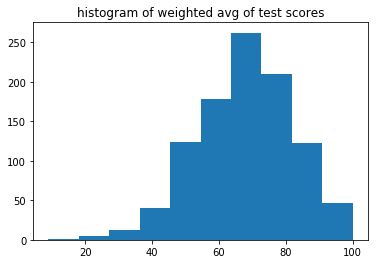

Jarque-Bera test statistics is 15.453387913085164 and p value is 0.00044089934264401887
Normality test statistics is 15.186721327231322 and p value is 0.0005037851534494478


In [73]:
wt_avg_scores = (df_studentsperformance['math score'] +
              df_studentsperformance['reading score'] + df_studentsperformance['writing score'])/3

plt.hist(wt_avg_scores)
plt.title("histogram of weighted avg of test scores")
plt.show()

jb_stats = jarque_bera(wt_avg_scores)
norm_stats = normaltest(wt_avg_scores)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

This new featuer(variable) seems to look normal but statistically, can be improved. Point is to learn from statistical analysis over visual in cases like this.

Jarque-Bera test statistics is 2.4353987431906026 and p value is 0.29591016374203183
Normality test statistics is 2.779857245981238 and p value is 0.2490930835165177


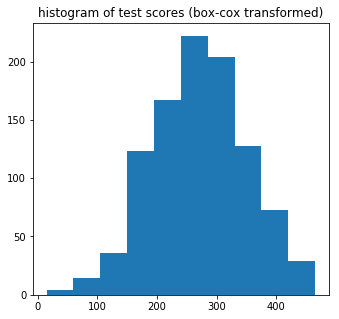

In [74]:
wt_avg_scores_boxcox,_ = boxcox(wt_avg_scores)

plt.figure(figsize=(18,5))

# histograms of the box-cox transformed data
plt.subplot(1, 3, 1)
plt.hist(wt_avg_scores_boxcox)
plt.title('histogram of test scores (box-cox transformed)')
          
jb_stats = jarque_bera(wt_avg_scores_boxcox)
norm_stats = normaltest(wt_avg_scores_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

The jarque-bera and ttest and histogram of the Box-Cox transformation confirm the data is now relatively normalized compared to the raw data version.

### 3. Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In [75]:
df_studentsperformance['wt_avg_scores'] = wt_avg_scores
df_studentsperformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,wt_avg_scores
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [76]:
# Statistically evaluate correlations of above variables with the weighted average of all exam scores.

wt_avg_gender_perform = df_studentsperformance.groupby('gender').mean()['wt_avg_scores']
print(wt_avg_gender_perform)

ttest_ind(df_studentsperformance[df_studentsperformance.gender == "female"][['wt_avg_scores']],
          df_studentsperformance[df_studentsperformance.gender == "male"][['wt_avg_scores']])

gender
female    69.569498
male      65.837483
Name: wt_avg_scores, dtype: float64


Ttest_indResult(statistic=array([4.16991353]), pvalue=array([3.31197364e-05]))

In [77]:
wt_avg_ethnicity_perform = df_studentsperformance.groupby('race/ethnicity').mean()['wt_avg_scores']
print(wt_avg_ethnicity_perform)

ethnicities = df_studentsperformance["race/ethnicity"].unique()
df_grp_ethnicities = df_studentsperformance.groupby("race/ethnicity")
for var in ['wt_avg_scores']:
    print("------------------------------------------------")
    print("Comparisons for performance: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(ethnicities)):
        for j in range(i+1, len(ethnicities)):
            print(
                "t-test between groups {0} and {1}:".format(ethnicities[i], ethnicities[j]))
            print(ttest_ind(
                df_studentsperformance[df_studentsperformance["race/ethnicity"]
                           == ethnicities[i]][var],
                df_studentsperformance[df_studentsperformance["race/ethnicity"] == ethnicities[j]][var]
            ))

race/ethnicity
group A    62.992509
group B    65.468421
group C    67.131661
group D    69.179389
group E    72.752381
Name: wt_avg_scores, dtype: float64
------------------------------------------------
Comparisons for performance: wt_avg_scores
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-1.2782467415831538, pvalue=0.20174731227733955)
t-test between groups group B and group A:
Ttest_indResult(statistic=1.3165043669633527, pvalue=0.1890930589509443)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.8031083992077255, pvalue=0.005279949204374891)
t-test between groups group B and group E:
Ttest_indResult(statistic=-4.46037807261396, pvalue=1.1254806793764281e-05)
t-test between groups group C and group A:
Ttest_indResult(statistic=2.4665932040951084, pvalue=0.01405260483160102)
t-test between groups group C and group D:
Ttest_indResult(statistic=-1.8063576953600955, pvalue=0.071381586738136

In [78]:
wt_avg_parent_ed_perform = df_studentsperformance.groupby('parental level of education').mean()['wt_avg_scores']
print(wt_avg_parent_ed_perform)

# Test whether group differences are significant.
df_parental_edu = df_studentsperformance['parental level of education'].unique()
df_grp_parental_edu = df_studentsperformance.groupby('parental level of education')
for var in ['wt_avg_scores']:
    print("------------------------------------------------")
    print("Comparisons for performance: {}".format(var))
    print("------------------------------------------------")
    for i in range(0, len(df_parental_edu)):
        for j in range(i+1, len(df_parental_edu)):
            print(
                "t-test between groups {0} and {1}:".format(df_parental_edu[i], df_parental_edu[j]))
            print(ttest_ind(
                df_studentsperformance[df_studentsperformance['parental level of education']
                           == df_parental_edu[i]][var],
                df_studentsperformance[df_studentsperformance['parental level of education'] == df_parental_edu[j]][var]
            ))

parental level of education
associate's degree    69.569069
bachelor's degree     71.923729
high school           63.096939
master's degree       73.598870
some college          68.476401
some high school      65.108007
Name: wt_avg_scores, dtype: float64
------------------------------------------------
Comparisons for performance: wt_avg_scores
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=2.200746866670862, pvalue=0.028421853941795295)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.7594769500339048, pvalue=0.4485891321202008)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=1.5013009645983189, pvalue=0.13421131516223408)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=5.539323736236874, pvalue=6.457780161976827e-08)
t-test between groups bachelor's degree and some high school:
Ttes

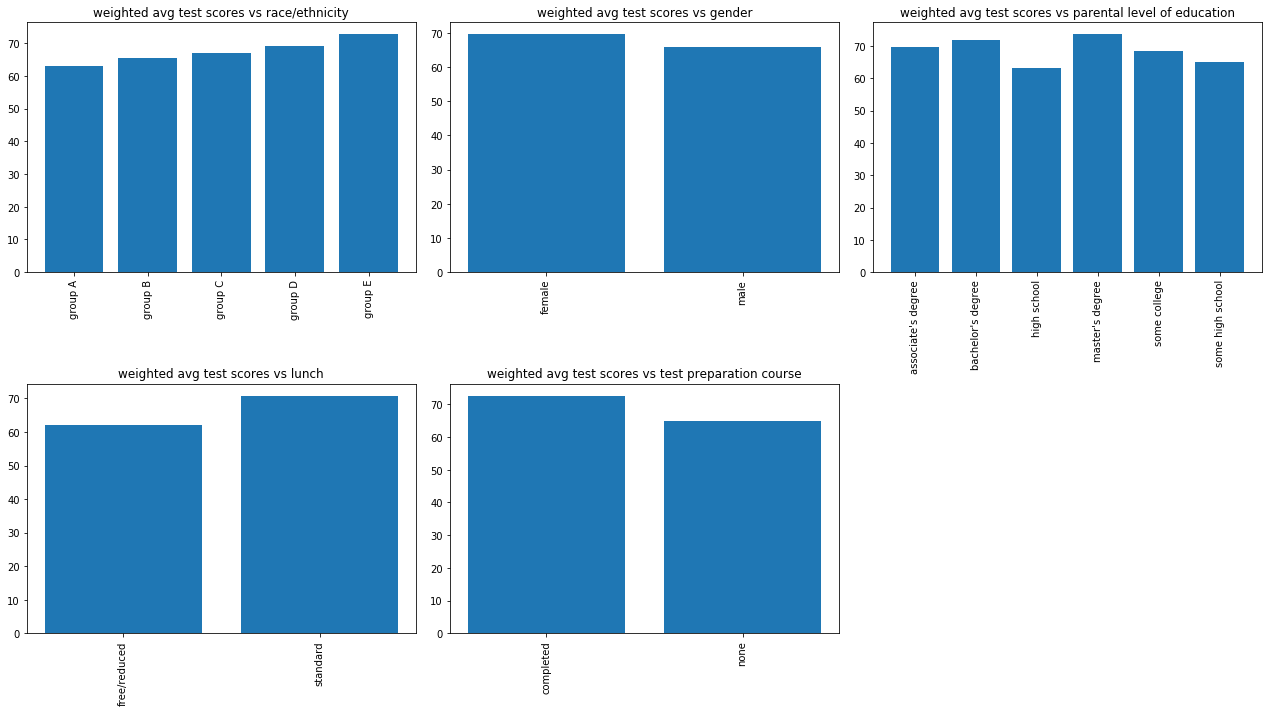

In [79]:
# plot for visual aid


plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.bar(df_studentsperformance.groupby('race/ethnicity')
        ['wt_avg_scores'].mean().index, df_studentsperformance.groupby('race/ethnicity')['wt_avg_scores'].mean())

plt.title('weighted avg test scores vs race/ethnicity')
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 2)
plt.bar(df_studentsperformance.groupby('gender')
        ['wt_avg_scores'].mean().index, df_studentsperformance.groupby('gender')['wt_avg_scores'].mean())

plt.title('weighted avg test scores vs gender')
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 3)
plt.bar(df_studentsperformance.groupby("parental level of education")
        ['wt_avg_scores'].mean().index, df_studentsperformance.groupby("parental level of education")['wt_avg_scores'].mean())

plt.title('weighted avg test scores vs parental level of education')
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 4)
plt.bar(df_studentsperformance.groupby("lunch")
        ['wt_avg_scores'].mean().index, df_studentsperformance.groupby("lunch")['wt_avg_scores'].mean())

plt.title('weighted avg test scores vs lunch')
plt.xticks(rotation="vertical")

plt.subplot(2, 3, 5)
plt.bar(df_studentsperformance.groupby("test preparation course")
        ['wt_avg_scores'].mean().index, df_studentsperformance.groupby("test preparation course")['wt_avg_scores'].mean())

plt.title('weighted avg test scores vs test preparation course')
plt.xticks(rotation="vertical")

plt.tight_layout()
plt.show()

- Group E seems to outperform all the other groups
- Females tend to perform better than males
- In general, parents with any college education results in broad improvement in student test scores for these subjects. The extreme differences are high school diploma vs masters degree (lowest to highest scores). One question to raise is that "some high school" is outperforming "high school". This can be interpreted as student's where parents didn't graduate high shcool outperformed students with parents that graduated high school. Since this data is pre-Box-Cox, this could be artifact; or there could be another study to go after. All-in-all, the average test scores are within ~10 percentage points, with no category in the failing range...commentarily, this is a low bar.
- Standard lunch schedules tend to benefit students more than the free/reduced style.
- Students who prepared for the tests seemed to do better in genera. Also, this seems to be one of the largest deltas in the results.